In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
train_image.shape

(60000, 28, 28)

In [6]:
train_label.shape

(60000,)

In [7]:
test_image.shape,test_label.shape

((10000, 28, 28), (10000,))

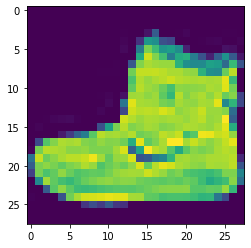

In [8]:
plt.imshow(train_image[0])

In [9]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [10]:
np.max(train_image[0])

255

In [11]:
train_label[0]

9

In [12]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
train_image = train_image/255
test_image = test_image/255 # 归一化

In [14]:
train_image.shape

(60000, 28, 28)

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28一维向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'],
             )

In [18]:
history = model.fit(train_image , train_label , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4991 - acc: 0.8240
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3753 - acc: 0.8644
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3358 - acc: 0.8774
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3118 - acc: 0.8854
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2944 - acc: 0.8914


In [19]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3548 - acc: 0.8730


[0.3547613322734833, 0.8730000257492065]

In [20]:
history.history.keys()

dict_keys(['loss', 'acc'])

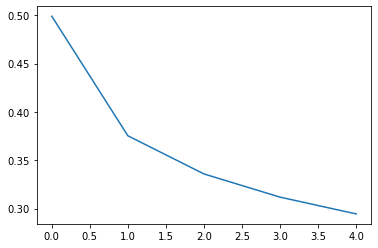

In [21]:
plt.plot(history.epoch,history.history.get('loss'))

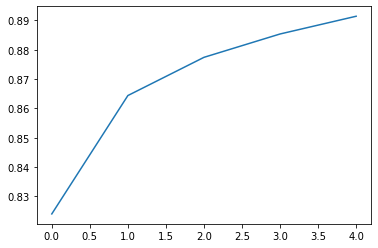

In [22]:
plt.plot(history.epoch,history.history.get('acc'))

In [23]:
train_label # 顺序编码

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
# beijing[1,0,0]
# shanghai[0,1,0]
# shenzhen[0,0,1] 独热编码

In [25]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)

In [26]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
train_label_onehot[-1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
train_label_onehot[-3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [30]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['acc'],
             )

In [51]:
model.fit(train_image,train_label_onehot,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2766 - acc: 0.8965
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2643 - acc: 0.8997
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2562 - acc: 0.9025
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2453 - acc: 0.9069
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2366 - acc: 0.9099


In [33]:
predict = model.predict(test_image)

In [34]:
test_image.shape

(10000, 28, 28)

In [35]:
predict.shape

(10000, 10)

In [36]:
predict[0]

array([2.16002268e-11, 1.02989926e-11, 2.20976890e-20, 2.39239739e-10,
       3.60902316e-16, 1.93737037e-02, 1.76965054e-14, 1.69433709e-02,
       6.11330933e-08, 9.63682771e-01], dtype=float32)

In [37]:
np.argmax(predict[0])

9

In [38]:
test_label[0]

9

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28一维向量
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc'],
             )

In [52]:
model.fit(train_image,train_label_onehot,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2298 - acc: 0.9122
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2216 - acc: 0.9156
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2133 - acc: 0.9199
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2068 - acc: 0.9217
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2013 - acc: 0.9229
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1961 - acc: 0.9258
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1905 - acc: 0.9272
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1866 - acc: 0.9285
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1811 - acc: 0.9299
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1783 - acc: 0.9306


In [62]:
history = model.fit(train_image,train_label_onehot,
                    epochs=5,
                   validation_data=(test_image,test_label_onehot)
                   )

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1393 - acc: 0.9463 - val_loss: 0.4670 - val_acc: 0.8855
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1360 - acc: 0.9477 - val_loss: 0.4548 - val_acc: 0.8946
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1331 - acc: 0.9497 - val_loss: 0.5408 - val_acc: 0.8886
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1328 - acc: 0.9492 - val_loss: 0.4586 - val_acc: 0.8926
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1291 - acc: 0.9503 - val_loss: 0.4647 - val_acc: 0.8938


In [63]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

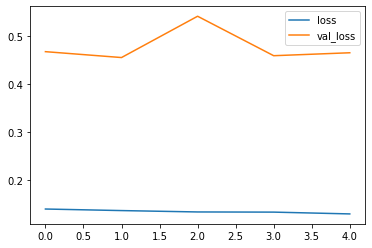

In [68]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.legend()

In [67]:
# 过拟合：在训练数据上得分很高，在测试数据上得分就相对比较低

In [69]:
# 欠拟合：在训练数据和测试数据得分都比较低 